# EDA and Visualisation of NoTelecomChurn

### Importing the necessary packages

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
from matplotlib import rcParams

### Reading the csv file

In [2]:
data=pd.read_csv('telecom_churn_data_New.csv')

In [3]:
data.head()

,State,Account Length,Area Code,Phone,International Plan,Vmail Plan,Vmail Messege,Day Min,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Min,Night Calls,Night Charge,Int Min,Int Calls,Int Charge,CustServe Call,Churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [7]:
data.shape

(4617, 21)

### The shape of the data is 4617 rows and 21 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4617 entries, 0 to 4616
Data columns (total 21 columns):
State                 4617 non-null object
Account Length        4617 non-null int64
Area Code             4617 non-null int64
Phone                 4617 non-null object
International Plan    4617 non-null object
Vmail Plan            4617 non-null object
Vmail Messege         4617 non-null int64
Day Min               4617 non-null float64
Day Calls             4617 non-null int64
Day Charge            4617 non-null float64
Eve Min               4617 non-null float64
Eve Calls             4617 non-null int64
Eve Charge            4617 non-null float64
Night Min             4617 non-null float64
Night Calls           4617 non-null int64
Night Charge          4617 non-null float64
Int Min               4617 non-null float64
Int Calls             4617 non-null int64
Int Charge            4617 non-null float64
CustServe Call        4617 non-null int64
Churn                 4617 non-nu

### We can see all the 21 columns and number of values also type of data. Among 21 columns, 8 columns have float as data, 8 columns have integer as data and 5 columns are object i.e, Categorical value.

In [8]:
data.isnull().sum().sum()

0

### The sum of number of null values including both rows and columns is 0, that means their are no null values.

In [5]:
data.describe()

,Account Length,Area Code,Vmail Messege,Day Min,Day Calls,Day Charge,Eve Min,Eve Calls,Eve Charge,Night Min,Night Calls,Night Charge,Int Min,Int Calls,Int Charge,CustServe Call
count,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000,4617.000000
mean,100.645224,437.046350,7.849903,180.447152,100.054364,30.676576,200.429088,100.179770,17.036703,200.623933,99.944120,9.028185,10.279294,4.433831,2.775926,1.567035
std,39.597194,42.288212,13.592333,53.983540,19.883027,9.177145,50.557001,19.821314,4.297332,50.543616,19.935053,2.274488,2.757361,2.457615,0.744413,1.307019
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,12.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,165.900000,87.000000,14.100000,167.100000,87.000000,7.520000,8.600000,3.000000,2.320000,1.000000
50%,100.000000,415.000000,0.000000,180.000000,100.000000,30.600000,200.800000,101.000000,17.070000,200.800000,100.000000,9.040000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,17.000000,216.800000,113.000000,36.860000,234.000000,114.000000,19.890000,234.900000,113.000000,10.570000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,351.500000,165.000000,59.760000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


### This describes the almost every aspect of the statistical point of view of the dataset. All the columns which are Numerical are always considered. we can see count (the number of data in that column), mean (the average of the data), std (standard deviation- the data deviation from the median), min and max value, Quartile value (The  % of value which lies equal or below to that quartile value)

### Account length and area code does not matter for describing the dataset because they are jus codes. Where as the parameters related to Day, Eve, Night and international gives us the usage insight of the data

In [11]:
from collections import Counter

In [23]:
col=data.columns
for i in col:
    print('Mode of--',i,'-- Occurance of',stats.mode(data[i])[0],'is',stats.mode(data[i])[1])

C:\Users\Vaishak P J\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:245: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  "values. nan values will be ignored.", RuntimeWarning)


Mode of-- State -- Occurance of ['WV'] is [149]
Mode of-- Account Length -- Occurance of [90] is [63]
Mode of-- Area Code -- Occurance of [415] is [2299]
Mode of-- Phone -- Occurance of [' 327-1058'] is [1]
Mode of-- International Plan -- Occurance of [' no'] is [4171]
Mode of-- Vmail Plan -- Occurance of [' no'] is [3381]
Mode of-- Vmail Messege -- Occurance of [0] is [3381]
Mode of-- Day Min -- Occurance of [154.] is [10]
Mode of-- Day Calls -- Occurance of [102] is [108]
Mode of-- Day Charge -- Occurance of [26.18] is [10]
Mode of-- Eve Min -- Occurance of [169.9] is [10]
Mode of-- Eve Calls -- Occurance of [105] is [111]
Mode of-- Eve Charge -- Occurance of [14.25] is [15]
Mode of-- Night Min -- Occurance of [186.2] is [10]
Mode of-- Night Calls -- Occurance of [105] is [115]
Mode of-- Night Charge -- Occurance of [9.66] is [19]
Mode of-- Int Min -- Occurance of [9.8] is [81]
Mode of-- Int Calls -- Occurance of [3] is [925]
Mode of-- Int Charge -- Occurance of [2.65] is [81]
Mode o

### This Shows the Mode( frequency of Occurance) of each column.

### Area Code 415 is in the 2299 rows among 4617. similarly International Plan and Vmail plan are 'no' for majority of data. Considering the the Target Variable that is 'Churn' in this case the frequency of False is high that means people doesnot churn out.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F850A5A9E8>,
      dtype=object)

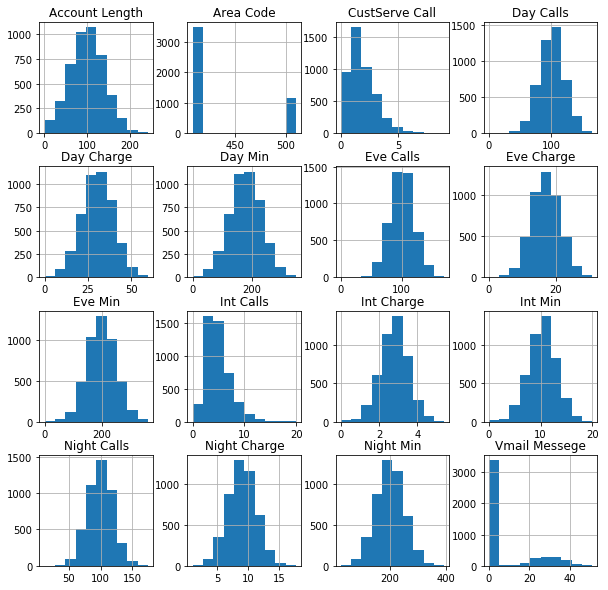

In [34]:
data.hist(figsize=(10,10))

### The histogram shows the distribution of data and we can say that it is quite normal, while few are skewed.

In [35]:
data.skew()

Account Length    0.106248
Area Code         1.135333
Vmail Messege     1.326734
Day Min          -0.002948
Day Calls        -0.081013
Day Charge       -0.002952
Eve Min          -0.005280
Eve Calls        -0.017554
Eve Charge       -0.005252
Night Min         0.020515
Night Calls       0.030886
Night Charge      0.020507
Int Min          -0.220891
Int Calls         1.366420
Int Charge       -0.221342
CustServe Call    1.046800
dtype: float64

### Skew should be between -1.96 to +1.96 for normal distriburtion

In [36]:
data.kurtosis()

Account Length   -0.092552
Area Code        -0.686039
Vmail Messege     0.123526
Day Min          -0.042399
Day Calls         0.196147
Day Charge       -0.042264
Eve Min           0.043630
Eve Calls         0.135980
Eve Charge        0.043522
Night Min         0.061409
Night Calls       0.068815
Night Charge      0.061380
Int Min           0.671602
Int Calls         3.302927
Int Charge        0.672518
CustServe Call    1.515026
dtype: float64

### Kurtosis tells about the sharpness the curve

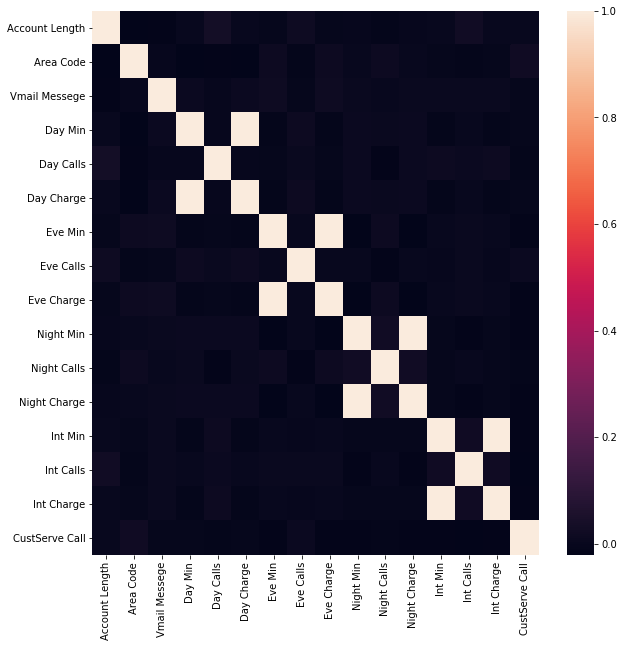

In [45]:
rcParams['figure.figsize']=[10,10]
sns.heatmap(data.corr())

### the data in the dataset is not actually that correlated expection Being the Min and Charge. Thus taking anyone of these two parameter would be suggested.

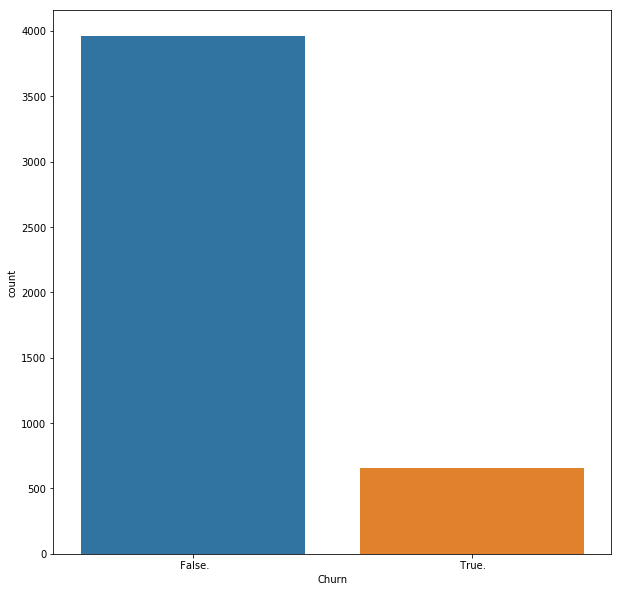

In [52]:
sns.countplot(data.Churn)